Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Newton's Method

a) Newton-Raphson method with residual convergence criteria

In [3]:
def newton_raphson_a(func,dFunc,x0,eps,maxIter=100):

    print('*** NEWTON-RAPHSON METHOD: PART A ***')
    
    # declare variables
    i = 1
    iterations = []
    residuals = []

    xNew = x0
    epsY = abs(func(xNew))
    
    while epsY > eps:
        # stop condittions
        if dFunc(x0) == 0:
            print(f'ERROR: Divide by zero')
            break
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # Newton-Raphson algorithm
        xNew = x0 - func(x0)/dFunc(x0)
        x0 = xNew

        # residual and convergence
        epsY = abs(func(xNew))

        # log values
        iterations.append(i)
        residuals.append(epsY)
        
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {iterations[-1]}')
    print(f'final residual: {residuals[-1]}\n')
        
    return xNew, iterations, residuals

b) Newton-Raphson method with convergence criteria $|x_{k+1} - x_k| > |x_k - x_{k-1}|$

In [4]:
def newton_raphson_b(func,dFunc,x0,maxIter=100):

    print('*** NEWTON-RAPHSON METHOD: PART B ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []

    err = 4
    errOld = 5
    
    while (err < errOld) & (err != 0.0):
        # stop condition
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        # Newton-Raphson algorithm
        xNew = x0 - func(x0)/dFunc(x0)

        # error and convergence
        errOld = err
        err = abs(xNew - x0)

        x0 = xNew

        # log values
        iterations.append(i)
        errors.append(err)
                
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {iterations[-2]}')
    print(f'final error: {errors[-2]}\n')
        
    return xNew, iterations, errors

Apply Newton's method to Problem 1

*** NEWTON-RAPHSON METHOD: PART A ***
final x-value: -0.45517649709361596
iterations: 4
final residual: 8.326672684688674e-17

*** NEWTON-RAPHSON METHOD: PART B ***
final x-value: -0.4551764970936159
iterations: 5
final error: 5.551115123125783e-17



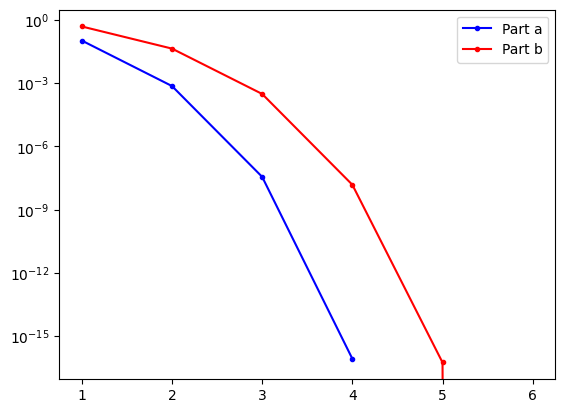

In [5]:
# given function and derivative
def f1(x):
    return np.arctan(x) + np.exp(x) - x**2

def df1(x):
    return 1 / (1 + x**2) + np.exp(x) - 2*x

def ddf1(x):
    return -2*x / (1 + x**2)**2 + np.exp(x) - 2

# compute root
x0 = 0
tol = 1e-8

_, iterations1, convCrit1 = newton_raphson_a(f1,df1,x0,tol)
_, iterations2, convCrit2  = newton_raphson_b(f1,df1,x0)

plt.semilogy(iterations1,convCrit1,'b.-',label='Part a')
plt.semilogy(iterations2,convCrit2,'r.-',label='Part b')
plt.legend()
plt.show()

c) Plot range of convergence for Newton's method

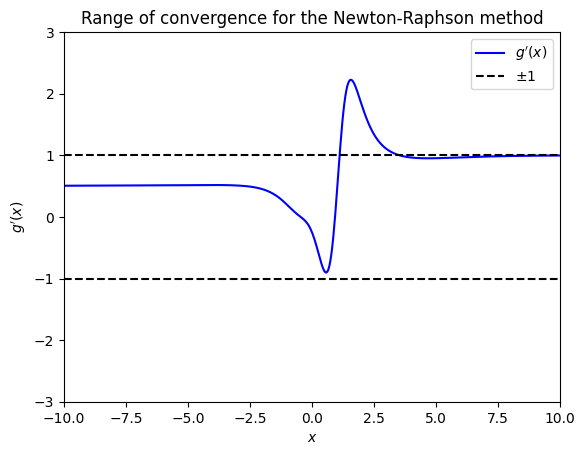

In [6]:
def dg(func,dFunc,ddFunc,x):
    return func(x)*ddFunc(x) / dFunc(x)**2

x = np.linspace(-10,10,500)

plt.plot(x,dg(f1,df1,ddf1,x),'b-',label=r'$g^\prime(x)$')
plt.plot(x,-1*np.ones_like(x),'k--',label=r'$\pm 1$')
plt.plot(x,np.ones_like(x),'k--')
plt.xlim([-10,10])
plt.ylim([-3,3])
plt.xlabel(r'$x$')
plt.ylabel(r'$g^\prime(x)$')
plt.title('Range of convergence for the Newton-Raphson method')
plt.legend()
plt.show()

d) Rate of convergence and asymptotic error constant

In [7]:
def convergenceRate(errors):
    e1 = errors[-3]
    e2 = errors[-2]
    e3 = errors[-1]

    num = np.log(e3) - np.log(e2)
    den = np.log(e2) - np.log(e1)

    return num/den

def errorConstant(errors,alpha):
    e1 = errors[-2]
    e2 = errors[-1]

    return e2 / e1**alpha

alpha = convergenceRate(convCrit2[:-1])
aec = errorConstant(convCrit2[:-1],alpha)

print(f'Convergence rate: {alpha}')
print(f'Asymptotic error constant: {aec}')

Convergence rate: 1.9572643847319036
Asymptotic error constant: 0.11058575106055786


# 2. Error Propagation

In [8]:
# given quantities and functions
muX = 3
muY = 2
sigX = 0.02
sigY = 0.01

def z(x,y):
    return 2*x - y + np.sin(x*y**2)

def w(z):
    return np.exp(z) - 2*(z**2 - 1)

# compute mean values
muZ = z(muX,muY)
muW = w(muZ)
print(f'muZ = {muZ}')
print(f'muW = {muW} ***\n')

# partial derivatives
def dzdx(x,y):
    return 2 + y**2*np.cos(x*y**2)

def dzdy(x,y):
    return -1 + 2*x*y*np.cos(x*y**2)

def dwdz(z):
    return np.exp(z) - 4*z

# evaluate partial derivatives at mean values
print(f'dz/dx = {dzdx(muX,muY)}')
print(f'dz/dy = {dzdy(muX,muY)}')
print(f'dw/dz = {dwdz(muZ)}\n')

# compute standard deviations
sigZ = np.sqrt((dzdx(muX,muY)*sigX)**2 + (dzdy(muX,muY)*sigY)**2)
sigW = dwdz(muZ)*sigZ
print(f'sigZ = {sigZ}')
print(f'sigW = {sigW} ***')

muZ = 3.463427081999565
muW = 9.935548654592328 ***

dz/dx = 5.375415834929969
dz/dy = 9.126247504789905
dw/dz = 18.072494631250116

sigZ = 0.14102084069822707
sigW = 2.5485983864130866 ***


# 3. Gaussian Elimination

In [9]:
A = np.array([[3,  0, -4],
              [4,  1,  3],
              [1, -3,  5]])

B = np.array([-3,\
               8,\
               2])

x = np.linalg.inv(A) @ B

print(f'x1 = {x[0]:0.5f}')
print(f'x2 = {x[1]:0.5f}')
print(f'x3 = {x[2]:0.5f}')

x1 = 0.65957
x2 = 1.62766
x3 = 1.24468


# 4. An Aerospace Application

Given information

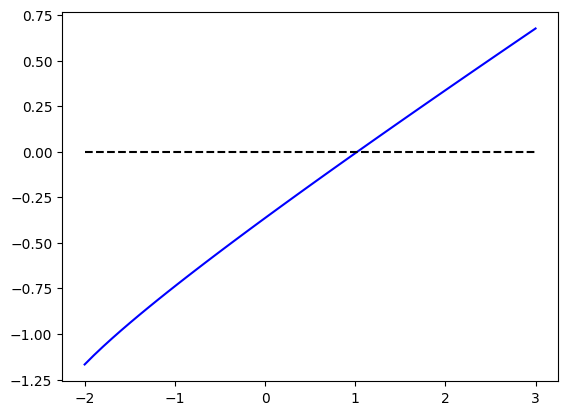

In [10]:
# pressure ratio
pRatio = 1.364

# Mach number
M = 0.78

# isentropic equation set to zero
def f4(gamma):
    return (1 + (gamma - 1)/2 * M**2)**(gamma / (gamma - 1)) - pRatio

g = np.linspace(-2,3)

plt.plot(g,f4(g),'b-')
plt.plot(g,np.zeros_like(g),'k--')
plt.show()

Newton-Raphson with finite differences

In [11]:
# finite difference step size
h = 1e-9

# derivative approximated by finite difference
def df4(x):
    return (f4(x + h) - f4(x)) / h

# initial guess and tolerance
gamma0 = 0
tol = 1e-8

# solve
_, _, _ = newton_raphson_a(f4,df4,gamma0,tol)
xNew, _, _ = newton_raphson_b(f4,df4,gamma0)
print(f'final residual: {f4(xNew)}')

*** NEWTON-RAPHSON METHOD: PART A ***
final x-value: 1.024204389493081
iterations: 3
final residual: 8.396616735240059e-12

*** NEWTON-RAPHSON METHOD: PART B ***
final x-value: 1.0242043894690351
iterations: 5
final error: 2.4424906541753444e-15

final residual: 4.440892098500626e-15
